<a href="https://colab.research.google.com/github/grzabrodskiy/ImageRec/blob/main/src/SciKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [14]:
import os

DATA_PATH = "drive/My Drive/School/CW_Dataset"

In [15]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [16]:
# Import libraries 
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40
import random
 


In [17]:
class_names = ['', 'Surprise', 'Fear', 'Disgust', 'Happiness', 'Sadness', 'Anger', 'Neutral']
class_map = {'Surprise': 1, 'Fear': 2, 'Disgust': 3, 'Happiness': 4, 'Sadness': 5, 'Anger': 6, 'Neutral': 7}
rows = 100
cols = 100
channels = 3



In [18]:
from skimage.color import rgb2gray
from skimage.feature import hog

img_data = dict()
labels = dict()
num_images = dict()

img_hog_list = []

for type in ['train', 'test', 'val']:

  img_data_list = []
  labels_list = []
  for label in class_names:
    if label == '': 
      continue
    
    for img in os.listdir(f'{DATA_PATH}/{type}/sorted/{label}'):
      input_img = cv2.imread(f'{DATA_PATH}/{type}/sorted/{label}/{img}')
      input_img = rgb2gray(input_img)
      input_img_resize = cv2.resize(input_img,(rows//4,cols//4))

      #HOG_des, HOG_image = hog(input_img, orientations=8, pixels_per_cell=(2, 2),
      #              cells_per_block=(2, 2), visualize=True)
      img_data_list.append(input_img_resize)
      #img_hog_list.append(HOG_image)
      labels_list.append(label)

  img_array = np.array(img_data_list).astype('float32') /255.0
  print(type, img_array.shape)
  img_array = img_array.reshape((len(img_array), -1)) # Flatten the images
  print(type, img_array.shape)

  img_data[type] = img_array
  labels[type] = np.array(labels_list)

  num_images[type] = img_data[type].shape[0]

print (labels['test'])




train (9823, 25, 25)
train (9823, 625)
test (3068, 25, 25)
test (3068, 625)
val (2448, 25, 25)
val (2448, 625)
['Surprise' 'Surprise' 'Surprise' ... 'Neutral' 'Neutral' 'Neutral']


ValueError: ignored

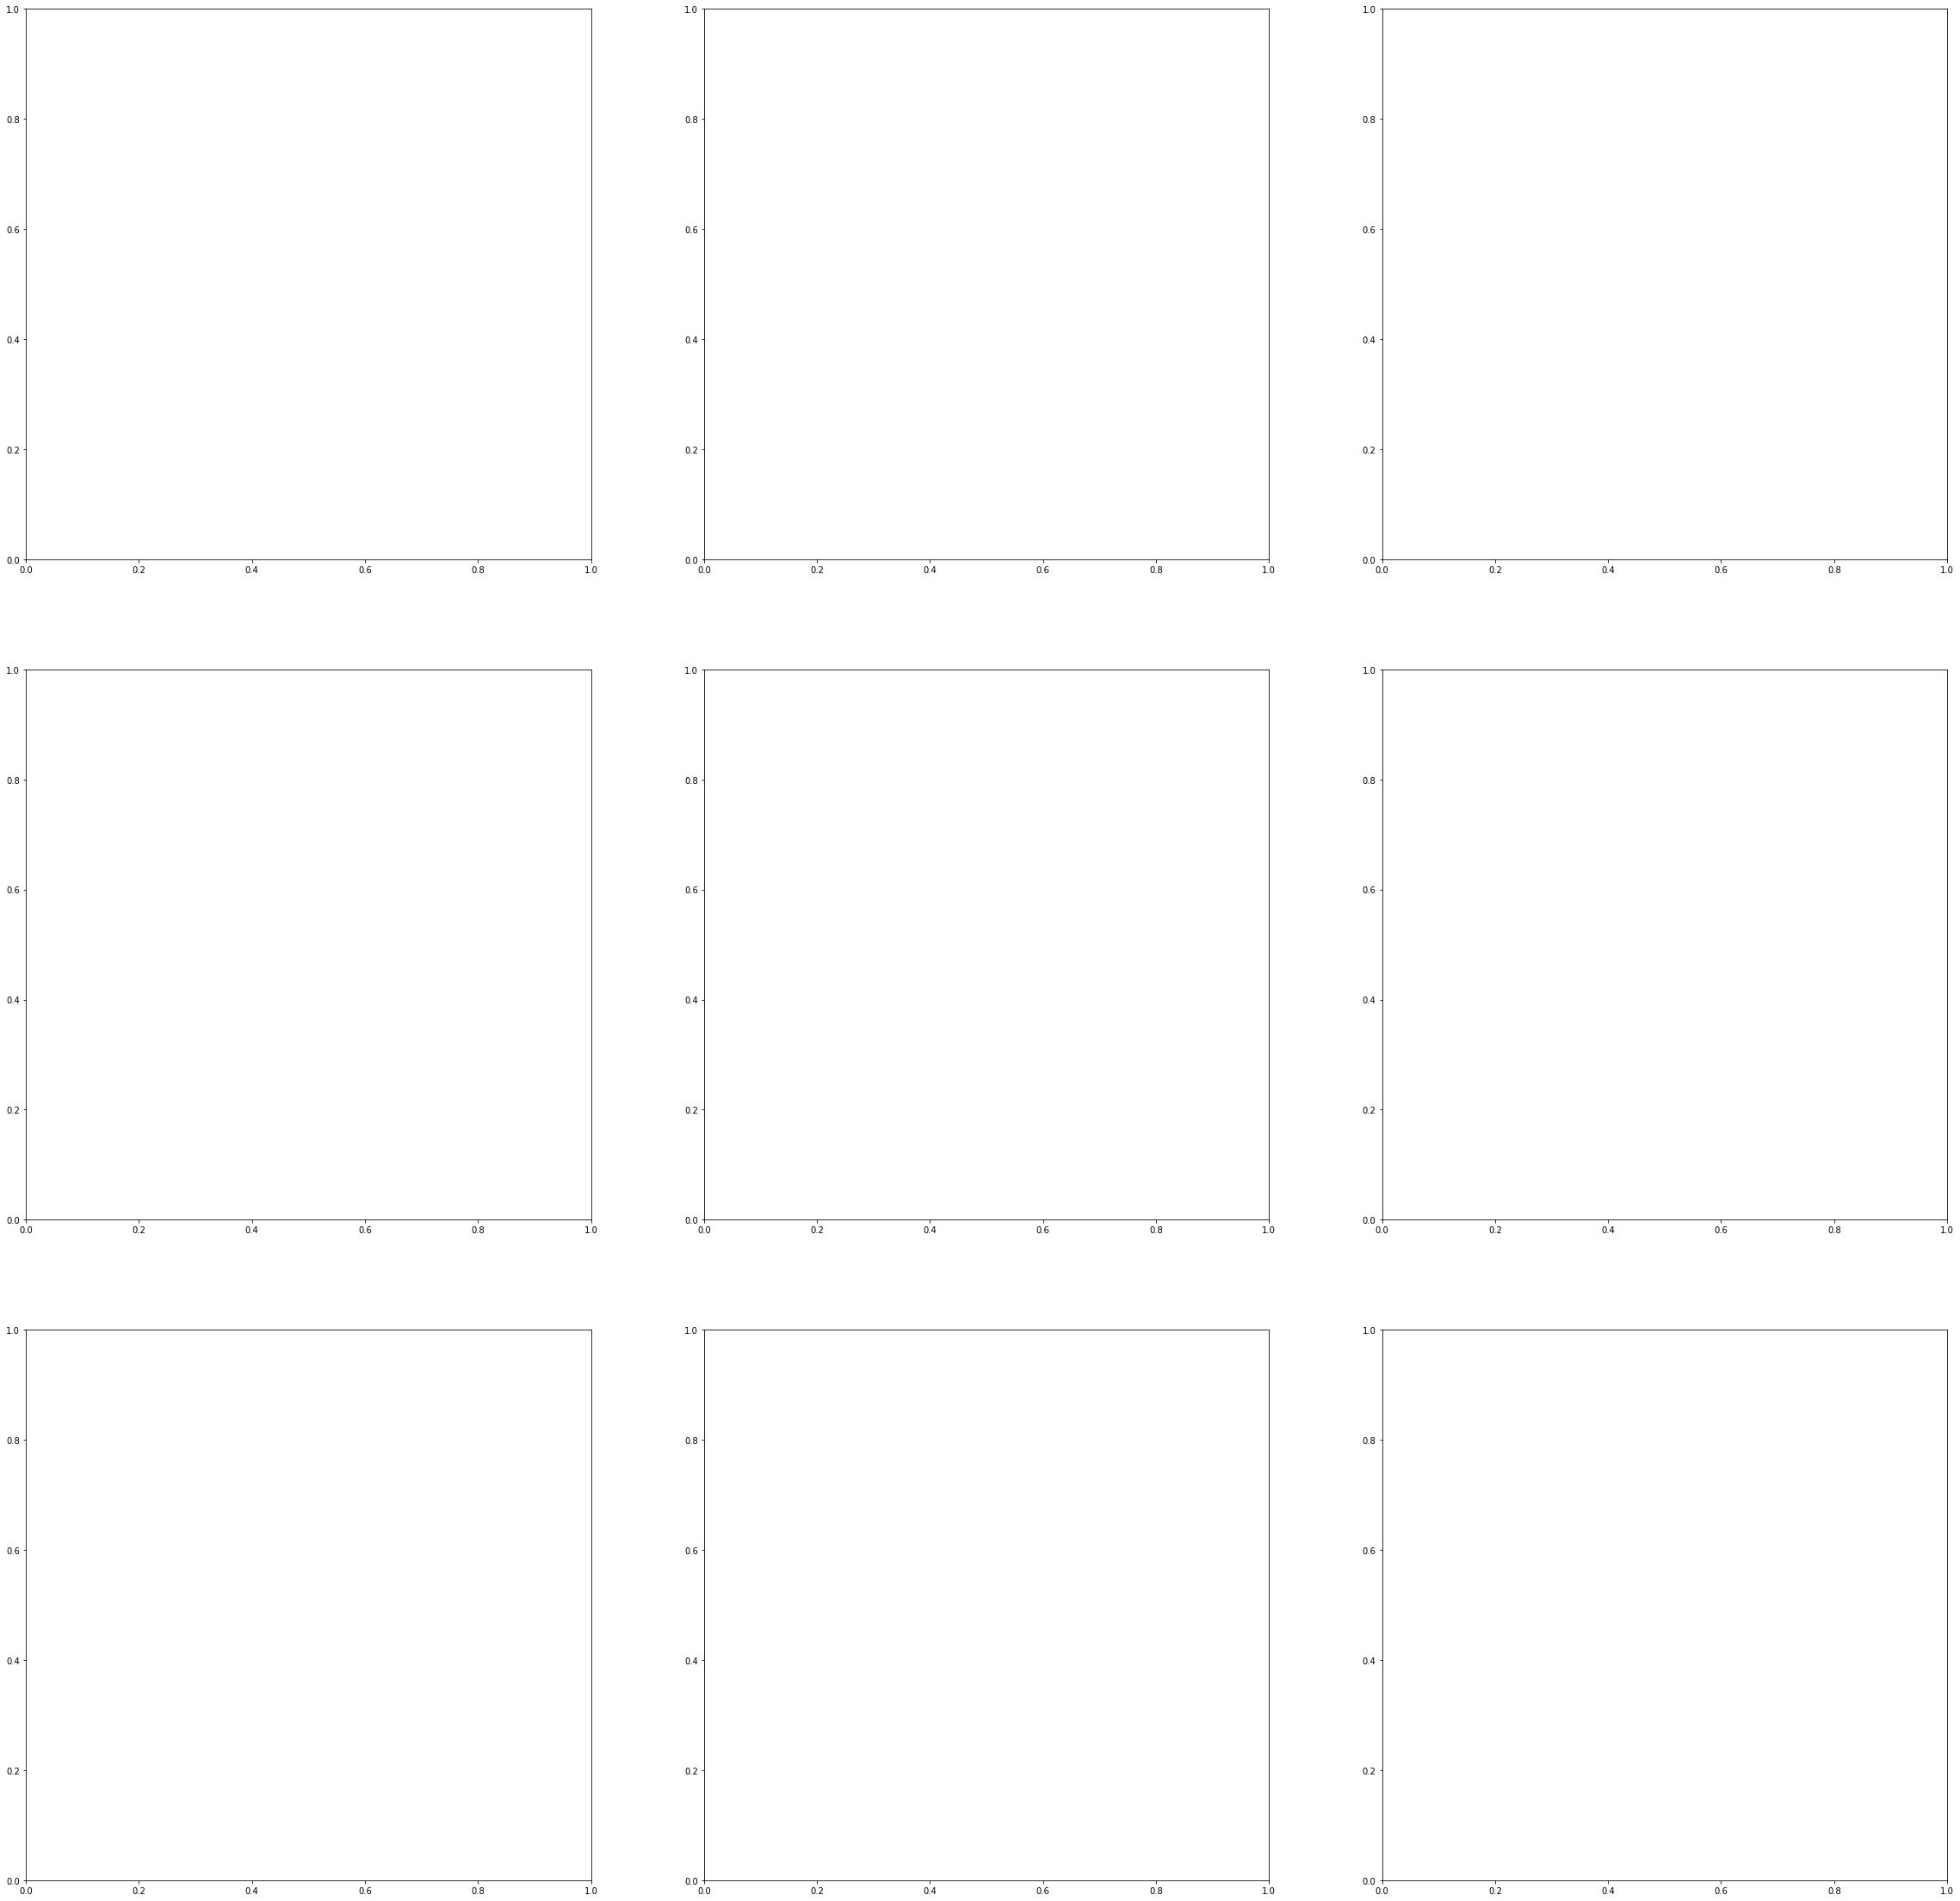

In [19]:


# Create an NxN display of samples
N = 3
fig, axs = plt.subplots(N, N)

train_data = img_data.get('train')
for i in range(3):
  for j in range(3):
    index = random.randint(0, 213-1) # pick a random index
    img = train_data[index]
    img = img.reshape(cols, rows, 1) #channels



    label = labels['train'][index]
    axs[i, j].imshow(img[:,:,0], cmap='gray')
    axs[i, j].set_title(label)

In [ ]:
from sklearn import svm, metrics

# Create a classifier: a support vector classifier
# This is with RBF kernel
classifier = svm.SVC(gamma=0.001) #gamma=0.001

print("classifier: ", classifier)
# C: From the doc: "For larger values of C, a smaller margin will be accepted if the decision 
# .  function is better at classifying all training points correctly. A lower C will encourage 
#    a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
#     In other words ``C`` behaves as a regularization parameter in the SVM."
# OVR: One-versus-rest (alternative: ovo -- One-versus-one)
# Kernel (RBF): Radial Basis Functions
# Probability (False): Estimate the probability for class membership from scores
# class_weight (None): Give more weight to some classess
# coef0: Constant r in the kernel definition (see above)
# 

In [ ]:
# We learn the SVM model on the training data
classifier.fit(img_data['train'], labels['train'])

# Now predict on the test data
predicted = classifier.predict(img_data['test'])
expected = labels['test']

In [ ]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels['test'], predicted)
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(ticks=range(0,7), labels=list(class_map.keys()))
plt.yticks(ticks=range(0,7), labels=list(class_map.keys()))
plt.show()